## Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score

# load data: features value and columns name

In [4]:
df = pd.read_csv('iris.csv',names=['x1','x2','x3','x4','class_name'])

# add numerical label

In [5]:
df['class_int'] = pd.Categorical(df.iloc[:,-1]).codes

# show head and tail of data

In [6]:
print('Head of dataset')
print(df.head())
print('\n')
print('Tail of datset')
print(df.tail())

Head of dataset
    x1   x2   x3   x4   class_name  class_int
0  5.1  3.5  1.4  0.2  Iris-setosa          0
1  4.9  3.0  1.4  0.2  Iris-setosa          0
2  4.7  3.2  1.3  0.2  Iris-setosa          0
3  4.6  3.1  1.5  0.2  Iris-setosa          0
4  5.0  3.6  1.4  0.2  Iris-setosa          0


Tail of datset
      x1   x2   x3   x4      class_name  class_int
145  6.7  3.0  5.2  2.3  Iris-virginica          2
146  6.3  2.5  5.0  1.9  Iris-virginica          2
147  6.5  3.0  5.2  2.0  Iris-virginica          2
148  6.2  3.4  5.4  2.3  Iris-virginica          2
149  5.9  3.0  5.1  1.8  Iris-virginica          2


# split data to train and test

In [7]:
train = df.sample(frac=0.7, random_state=np.random.RandomState())
test = df.loc[~df.index.isin(train.index)]

# split data to classes

In [8]:
class1 = train.loc[df.class_int == 0]
class2 = train.loc[df.class_int == 1]
class3 = train.loc[df.class_int == 2]

# find mean of classes

In [9]:
meanClass1 = class1.iloc[:,[0,1,2,3]].mean(axis='index').tolist()
meanClass2 = class2.iloc[:,[0,1,2,3]].mean(axis='index').tolist()
meanClass3 = class3.iloc[:,[0,1,2,3]].mean(axis='index').tolist()

# Combine the mean features into initial centroids

In [10]:
initial_centroids = np.array([meanClass1, meanClass2, meanClass3])

# Apply KMeans with the initial centroids

In [11]:
kmeans = KMeans(n_clusters=3, init=initial_centroids, n_init=1)
kmeans.fit(train.iloc[:, [0, 1, 2, 3]])

KMeans(init=array([[4.96      , 3.39142857, 1.44285714, 0.24285714],
       [5.92285714, 2.75428571, 4.25714286, 1.31714286],
       [6.69714286, 2.98857143, 5.65714286, 2.02571429]]),
       n_clusters=3, n_init=1)

# Predict clusters for test data

In [12]:
test_predictions = kmeans.predict(test.iloc[:, [0, 1, 2, 3]])

# Map predicted clusters to class labels
# We map the KMeans cluster labels back to the actual class labels
# By using the most common true class in each cluster

In [13]:
cluster_to_class = {}
for i in range(3):
    # For each cluster, find the most common class
    mask = (kmeans.labels_ == i)
    common_class = train.loc[mask, 'class_int'].mode()[0]
    cluster_to_class[i] = common_class

# Convert predicted clusters to predicted class labels

In [14]:
predicted_classes = np.vectorize(cluster_to_class.get)(test_predictions)

# Compare predicted labels with actual class labels from test set

In [15]:
actual_classes = test['class_int'].values
accuracy = accuracy_score(actual_classes, predicted_classes)
print(f"Accuracy of KMeans clustering: {accuracy * 100:.2f}%")

Accuracy of KMeans clustering: 84.44%


# Visualization

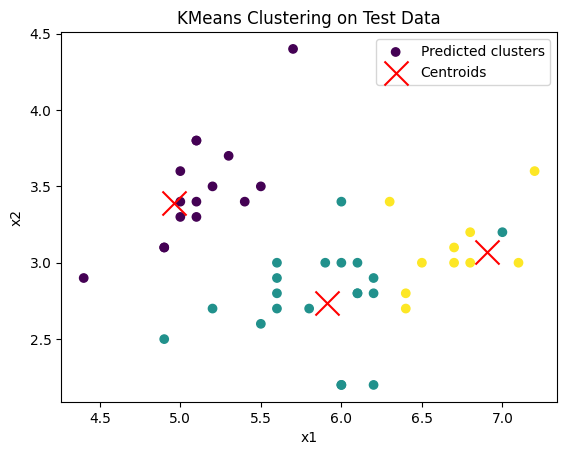

In [16]:
plt.scatter(test['x1'], test['x2'], c=predicted_classes, cmap='viridis', marker='o', label='Predicted clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KMeans Clustering on Test Data')
plt.legend()
plt.show()

# Calculate distances between all pairs of cluster centers

In [17]:
centroid_distances = cdist(kmeans.cluster_centers_, kmeans.cluster_centers_)

# Extract the upper triangular part of the distance matrix, ignoring the diagonal (distances between the same clusters)

In [18]:
pairwise_distances = centroid_distances[np.triu_indices(len(kmeans.cluster_centers_), k=1)]

# Calculate the mean of these pairwise distances

In [19]:
threshold = pairwise_distances.mean()
print(f"Threshold for merging clusters based on average pairwise distance: {threshold:.4f}")

Threshold for merging clusters based on average pairwise distance: 3.4529


# Check for merging condition (if distance between clusters is less than the threshold)

In [20]:
for i in range(len(centroid_distances)):
    for j in range(i + 1, len(centroid_distances)):
        if centroid_distances[i, j] < threshold:
            print(f"Clusters {i} and {j} are close and should be considered for merging (distance = {centroid_distances[i, j]:.4f}).")

Clusters 0 and 1 are close and should be considered for merging (distance = 3.3808).
Clusters 1 and 2 are close and should be considered for merging (distance = 1.8641).
